# **Imports and listed versions**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix, confusion_matrix 
from sklearn.feature_selection import SelectKBest, chi2 

In [2]:
print(f'tensorflow=={tf.__version__}')
print(f'pandas=={pd.__version__}')
print(f'sklearn=={sklearn.__version__}')
print(f'matplotlib=={matplotlib.__version__}')
print(f'seaborn=={sns.__version__}')

tensorflow==2.2.0
pandas==1.1.3
sklearn==0.23.2
matplotlib==3.3.1
seaborn==0.11.0


# **Hyperparameters**

In [3]:
validation_size = 0.25
seed = 111

# **Load dataset that is an xlsx file**

In [4]:
df = pd.read_excel("Medicines_output_european_public_assessment_reports.xlsx", skiprows=[0,1,2,3,4,5,6,7])

**Number of rows (instances) and columns**

In [5]:
print(f'Number of rows: {df.shape[0]}. Nuymber of columns: {df.shape[1]}')

Number of rows: 1562. Nuymber of columns: 30


**Looking at the first five rows**

In [6]:
df.head()

,Category,Medicine name,Therapeutic area,International non-proprietary name (INN) / common name,Active substance,Product number,Patient safety,Authorisation status,ATC code,Additional monitoring,...,Vet pharmacotherapeutic group,Date of opinion,Decision date,Revision number,Condition / indication,Species,ATCvet code,First published,Revision date,URL
0,Human,Simponi,"Arthritis, Psoriatic, Spondylitis, Ankylosing,...",golimumab,Golimumab,EMEA/H/C/000992,no,Authorised,L04AB06,no,...,NaN,NaN,06/09/2018,32.0,"Arthritis, rheumatoid, \tAxial spondyloarthrit...",NaN,NaN,", , 02/07/2018, ,",20/12/2018,https://www.ema.europa.eu/en/medicines/human/E...
1,Human,Moventig,"Constipation, Opioid-Related Disorders",naloxegol,naloxegol oxalate,EMEA/H/C/002810,no,Authorised,A06AH03,yes,...,NaN,NaN,12/12/2018,8.0,Treatment of opioid-induced constipation (OIC)...,NaN,NaN,", , 23/07/2018, ,",20/12/2018,https://www.ema.europa.eu/en/medicines/human/E...
2,Veterinary,Imrestor,NaN,Pegbovigrastim,Pegbovigrastim,EMEA/V/C/002763,no,Authorised,NaN,no,...,Antineoplastic and immunomodulating agents imm...,NaN,07/12/2018,1.0,"As an aid in a herd management programme, to r...","Cattle (cows and heifers), Cattle",QL03AA90,", , 09/12/2015, ,",20/12/2018,https://www.ema.europa.eu/en/medicines/veterin...
3,Human,Odomzo,"Carcinoma, Basal Cell",sonidegib,sonidegib diphosphate,EMEA/H/C/002839,no,Authorised,L01XX,yes,...,NaN,25/06/2015,02/10/2018,6.0,Odomzo is indicated for the treatment of adult...,NaN,NaN,", , 25/01/2018, ,",20/12/2018,https://www.ema.europa.eu/en/medicines/human/E...
4,Human,Ivabradine JensonR,"Angina Pectoris, Heart Failure",ivabradine,ivabradine hydrochloride,EMEA/H/C/004217,no,Withdrawn,C01EB17,no,...,NaN,15/06/2016,11/11/2016,0.0,Symptomatic treatment of chronic stable angina...,NaN,NaN,", , 11/11/2016, ,",20/12/2018,https://www.ema.europa.eu/en/medicines/human/E...


# **Data cleaning and visualization**

**Check for duplicate values in the dataframe**

In [7]:
df[df.duplicated()]

,Category,Medicine name,Therapeutic area,International non-proprietary name (INN) / common name,Active substance,Product number,Patient safety,Authorisation status,ATC code,Additional monitoring,...,Vet pharmacotherapeutic group,Date of opinion,Decision date,Revision number,Condition / indication,Species,ATCvet code,First published,Revision date,URL


**Input features set and target variable**

In [8]:
data = df[["Category", "Patient safety", "Additional monitoring", "Generic", "Biosimilar", "Conditional approval", "Exceptional circumstances", "Accelerated assessment", "Orphan medicine", 'Authorisation status']]

**Check how many missing values are in the data**

In [9]:
pd.isnull(data).sum()

Category                     0
Patient safety               0
Additional monitoring        0
Generic                      0
Biosimilar                   0
Conditional approval         0
Exceptional circumstances    0
Accelerated assessment       0
Orphan medicine              0
Authorisation status         0
dtype: int64

**Print unique categories in all categorical variable**

In [10]:
print(f'Category: {df["Category"].unique()}', f'Patient safety: {df["Patient safety"].unique()}', f'Additional monitoring: {df["Additional monitoring"].unique()}', 
      f'Generic: {df["Generic"].unique()}', f'Biosimilar: {df["Biosimilar"].unique()}', f'Conditional approval: {df["Conditional approval"].unique()}',
      f'Exceptional circumstances: {df["Exceptional circumstances"].unique()}', f'Accelerated assessment: {df["Accelerated assessment"].unique()}',
      f'Orphan medicine: {df["Orphan medicine"].unique()}', f'Authorisation status: {df["Authorisation status"].unique()}' ,sep='\n')

Category: ['Human' 'Veterinary']
Patient safety: ['no' 'yes']
Additional monitoring: ['no' 'yes']
Generic: ['no' 'yes']
Biosimilar: ['no' 'yes']
Conditional approval: ['no' 'yes']
Exceptional circumstances: ['no' 'yes']
Accelerated assessment: ['no' 'yes']
Orphan medicine: ['no' 'yes']
Authorisation status: ['Authorised' 'Withdrawn' 'Refused' 'Suspended']


**Plot frequency distribution of the categories for the target variable (Authorisation status)**

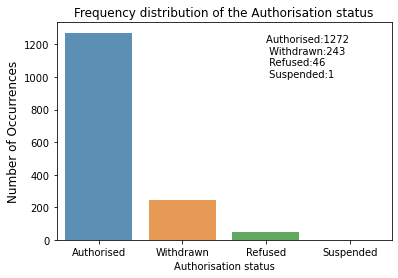

In [11]:
status_count = data['Authorisation status'].value_counts()
sns.countplot(x='Authorisation status',data=data, alpha=0.8)
plt.text(2,1000, f'Authorised:{status_count.values[0]} \n Withdrawn:{status_count.values[1]} \n Refused:{status_count.values[2]} \n Suspended:{status_count.values[3]}')
plt.title('Frequency distribution of the Authorisation status')
plt.ylabel('Number of Occurrences', fontsize=12);

**Remove the instance that is labled as suspended**

In [12]:
data = data.drop(data[data['Authorisation status'] == 'Suspended'].index)

**Plot relative frequency distribution of the categories for the target variable (Authorisation status)**

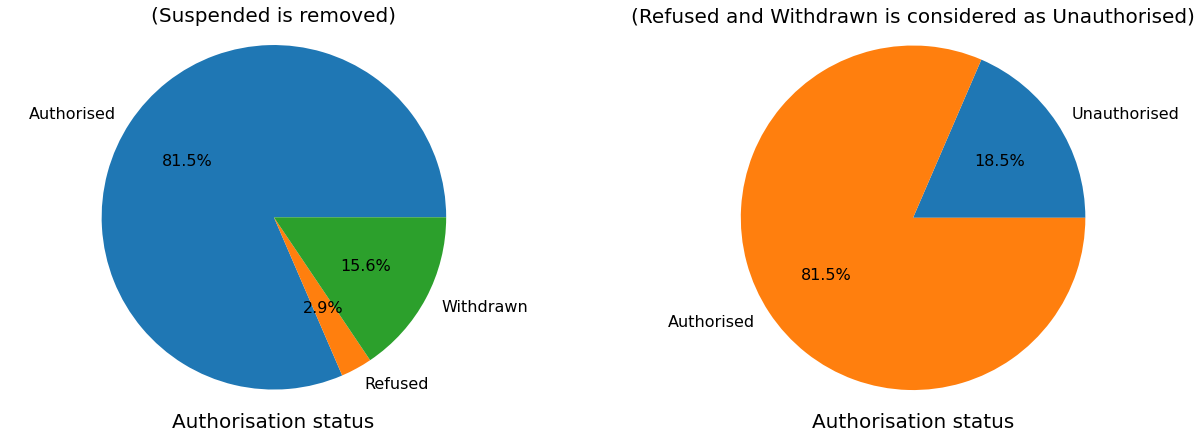

In [13]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(21,7))

labels = data['Authorisation status'].astype('category').cat.categories.tolist()
counts = data['Authorisation status'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
axs[0].pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':16}) 
axs[0].axis('equal')
axs[0].set_xlabel('Authorisation status', fontsize=20)
axs[0].set_title('(Suspended is removed)', fontsize=20)

data = data.replace(['Authorised', 'Refused', 'Withdrawn'],[1, 0, 0])

labels = data['Authorisation status'].astype('category').cat.categories.tolist()
counts = data['Authorisation status'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
axs[1].pie(sizes, labels=['Unauthorised', 'Authorised'], autopct='%1.1f%%', textprops={'fontsize':16}) 
axs[1].axis('equal')
axs[1].set_xlabel('Authorisation status', fontsize=20)
axs[1].set_title('(Refused and Withdrawn is considered as Unauthorised)', fontsize=20);

**Replacing values of categorical variable to numerical values for further processing**

In [14]:
data = data.replace(['Veterinary','Human'],[0, 1])
data = data.replace(['no'], 0)
data = data.replace(['yes'], 1)

**Examine relationships within data**

In [15]:
def plot_cat_feature(d, x, y='Authorisation status', labels = ['Unauthorised', 'Authorised']):

    d = d.groupby(x)[y].value_counts()
    s = d.sum()
    df1  = d.apply(lambda x: x / s)
    df1 = df1.rename('percent').reset_index()
    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette={1:"blue", 0:"red"})
    g.ax.set_ylim(0,1)
    g.set_xticklabels(['No', 'Yes'])
    leg = g.axes.flat[0].get_legend()
    
    for t, l in zip(g._legend.texts, labels): t.set_text(l)
        
    for p in g.ax.patches:
        txt = str(p.get_height().round(2))
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt, fontdict={'size': 14})

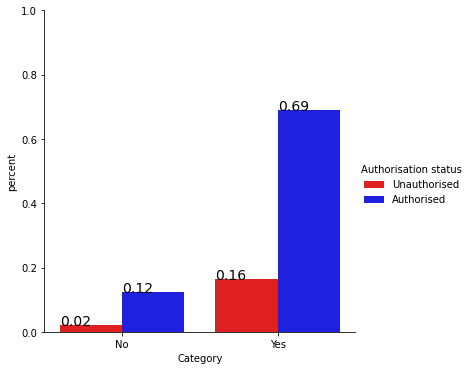

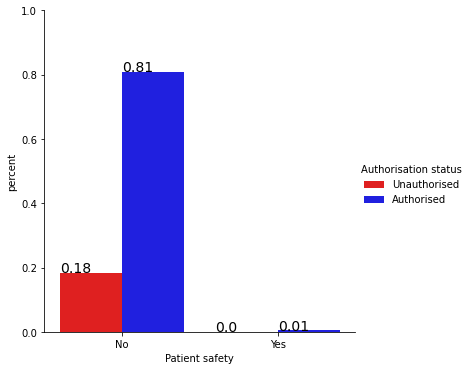

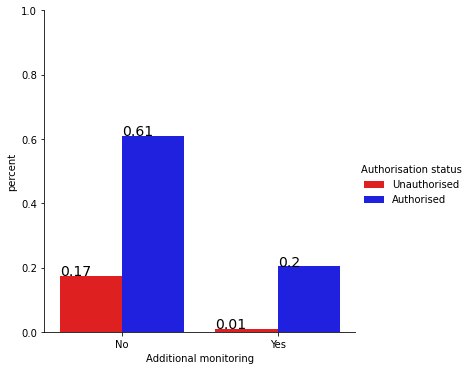

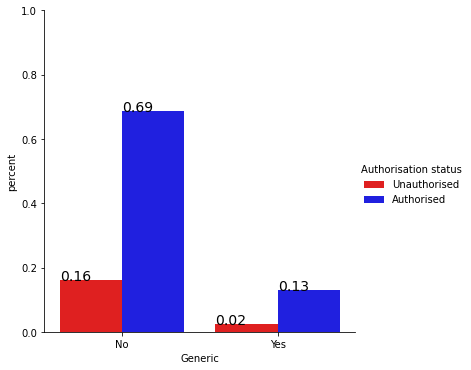

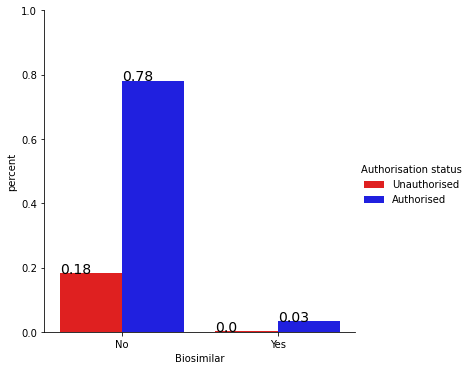

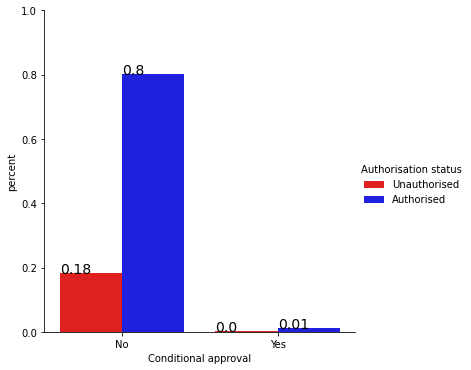

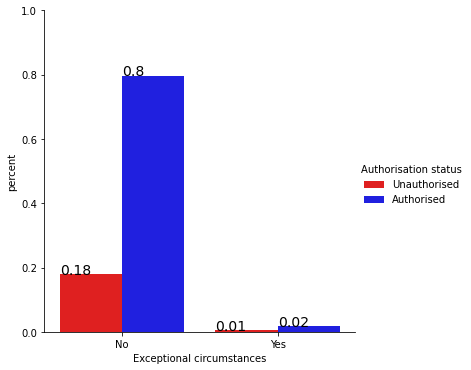

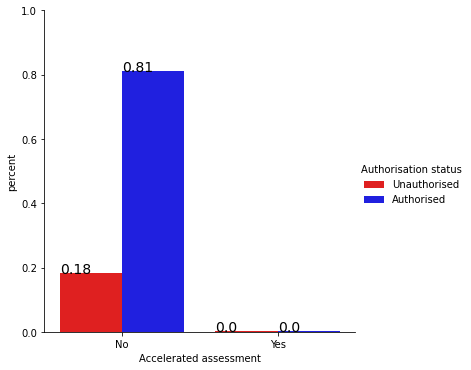

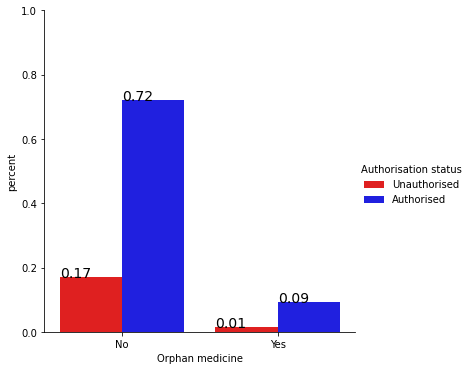

In [16]:
all_features = ["Category", "Patient safety", "Additional monitoring", "Generic", "Biosimilar", "Conditional approval", "Exceptional circumstances", "Accelerated assessment", "Orphan medicine"]
for x in all_features: plot_cat_feature(data, x)

# Pearson’s correlation coefficien

In [17]:
data.drop(['Authorisation status'], axis=1).corr()

,Category,Patient safety,Additional monitoring,Generic,Biosimilar,Conditional approval,Exceptional circumstances,Accelerated assessment,Orphan medicine
Category,1.000000,0.007411,0.215631,0.089022,0.080306,0.048171,0.028438,-0.173990,0.143256
Patient safety,0.007411,1.000000,0.083851,-0.032299,-0.014825,-0.008893,-0.011865,-0.005466,-0.026446
Additional monitoring,0.215631,0.083851,1.000000,-0.208688,0.197723,0.196305,0.185246,-0.037518,0.236377
Generic,0.089022,-0.032299,-0.208688,1.000000,-0.082570,-0.049529,-0.066087,-0.030442,-0.147295
Biosimilar,0.080306,-0.014825,0.197723,-0.082570,1.000000,-0.022733,-0.030333,-0.013972,-0.067607
Conditional approval,0.048171,-0.008893,0.196305,-0.049529,-0.022733,1.000000,-0.018195,-0.008381,0.228596
Exceptional circumstances,0.028438,-0.011865,0.185246,-0.066087,-0.030333,-0.018195,1.000000,0.165746,0.258430
Accelerated assessment,-0.173990,-0.005466,-0.037518,-0.030442,-0.013972,-0.008381,0.165746,1.000000,-0.024925
Orphan medicine,0.143256,-0.026446,0.236377,-0.147295,-0.067607,0.228596,0.258430,-0.024925,1.000000


# **Feature Selection**

# Let's split the dataset to two sets (training and validation). Use only the training set to perform feature selection to avoid data leakage. Hence, not touching the validation (test) set.

In [18]:
X = data[all_features]
y = data['Authorisation status']

In [19]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=validation_size, random_state=seed)

# Based on Pearson’s correlation coefficient

In [20]:
training_set = pd.concat([X_train, y_train], axis=1)

In [21]:
training_set.corr()

,Category,Patient safety,Additional monitoring,Generic,Biosimilar,Conditional approval,Exceptional circumstances,Accelerated assessment,Orphan medicine,Authorisation status
Category,1.000000,-0.003622,0.222309,0.084216,0.080652,0.045997,0.045149,-0.156739,0.146493,-0.033441
Patient safety,-0.003622,1.000000,0.048399,-0.030513,-0.013854,-0.007901,-0.010609,-0.004704,-0.025163,0.003625
Additional monitoring,0.222309,0.048399,1.000000,-0.208868,0.207651,0.187946,0.206533,-0.034845,0.249481,0.175101
Generic,0.084216,-0.030513,-0.208868,1.000000,-0.082009,-0.046771,-0.062800,-0.027843,-0.148957,0.038734
Biosimilar,0.080652,-0.013854,0.207651,-0.082009,1.000000,-0.021235,-0.028513,-0.012641,-0.067630,0.056940
Conditional approval,0.045997,-0.007901,0.187946,-0.046771,-0.021235,1.000000,-0.016261,-0.007210,0.188075,0.032474
Exceptional circumstances,0.045149,-0.010609,0.206533,-0.062800,-0.028513,-0.016261,1.000000,0.080927,0.289048,0.009990
Accelerated assessment,-0.156739,-0.004704,-0.034845,-0.027843,-0.012641,-0.007210,0.080927,1.000000,-0.022961,-0.002301
Orphan medicine,0.146493,-0.025163,0.249481,-0.148957,-0.067630,0.188075,0.289048,-0.022961,1.000000,0.076298
Authorisation status,-0.033441,0.003625,0.175101,0.038734,0.056940,0.032474,0.009990,-0.002301,0.076298,1.000000


# Baseed on the Chi-Squared Statistic.

**Helper function for feature selection**

In [22]:
def select_cat_features_chi(X, y):
    col = X.columns    
    fs_chi = SelectKBest(chi2, k='all')
    fs_chi.fit(X, y)
    plt.barh([i for i in range(len(fs_chi.scores_))], fs_chi.scores_)
    plt.xlabel('Score')
    plt.title('Chi-Squared Statistic')   
    plt.yticks(ticks=range(len(col)), labels=col)
    for i in range(len(fs_chi.scores_)):
        print('%s: %f' % (col[i], fs_chi.scores_[i]))

Category: 0.194581
Patient safety: 0.015294
Additional monitoring: 27.962378
Generic: 1.486842
Biosimilar: 3.657118
Conditional approval: 1.219039
Exceptional circumstances: 0.114274
Accelerated assessment: 0.006168
Orphan medicine: 6.065877


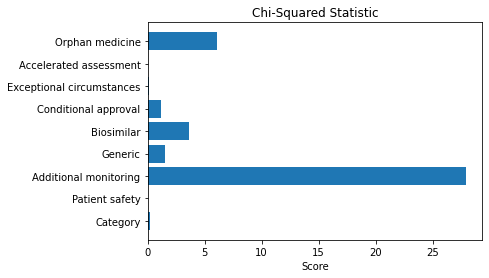

In [23]:
select_cat_features_chi(X_train, y_train) 

**Select the feature set.**

In [24]:
fs = ['Additional monitoring', 'Orphan medicine', 'Biosimilar', 'Generic', 'Conditional approval', 'Category']

**Extract predictors and target variable based on the selected features (imbalanced data)**

In [25]:
X_train_fs = X_train[fs]
X_val_fs = X_val[fs]

# **Training on imbalanced data**

**Models**

In [26]:
logisticRegr = LogisticRegression()
clf_RF = RandomForestClassifier()
clf_svc = svm.SVC()  

**Helper function for calculating accuracy, specificity, and sensitivity.**

In [27]:
def model_performance(X, y, model):
    tn, fp, fn, tp = confusion_matrix(y, model.predict(X)).ravel()
    acc = (tp + tn)/ (tn + fp + fn + tp)
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    return round(acc, 3), round(specificity, 3), round(sensitivity, 3)

**Logistic Regression Model trained with imbalanced data.**

In [28]:
logisticRegr.fit(X_train_fs, y_train)
acc_train, _, _ = model_performance(X_train_fs, y_train, logisticRegr)
print(f'Accuracy of Logistic Regression Model trained with imbalanced data (train set): {acc_train}')
acc, spe, sen = model_performance(X_val_fs, y_val, logisticRegr)
print('The performance of Logistic Regression Model trained with imbalanced data:', f'Accuracy: {acc}', f'Specificity: {spe}', f'Sensitivity: {sen}', sep='\n')

Accuracy of Logistic Regression Model trained with imbalanced data (train set): 0.814
The performance of Logistic Regression Model trained with imbalanced data:
Accuracy: 0.818
Specificity: 0.0
Sensitivity: 1.0


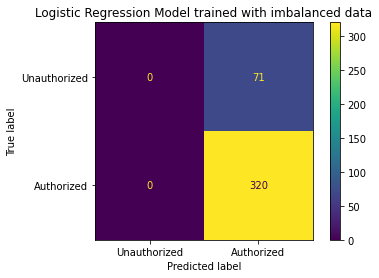

In [29]:
plot_confusion_matrix(logisticRegr, X_val_fs, y_val, display_labels=["Unauthorized", "Authorized"]).ax_.set_title('Logistic Regression Model trained with imbalanced data');

**Random Forest Classifier trained with imbalanced data**

In [30]:
clf_RF.fit(X_train_fs, y_train)
acc_train, _, _ = model_performance(X_train_fs, y_train, clf_RF)
print(f'Accuracy of Random Forest Model trained with imbalanced data (train set): {acc_train}')
acc, spe, spe = model_performance(X_val_fs, y_val, clf_RF)
print('The performance of Random Forest Model trained with imbalanced data:', f'Accuracy: {acc}', f'Specificity: {spe}', f'Sensitivity: {sen}', sep='\n')

Accuracy of Random Forest Model trained with imbalanced data (train set): 0.815
The performance of Random Forest Model trained with imbalanced data:
Accuracy: 0.821
Specificity: 1.0
Sensitivity: 1.0


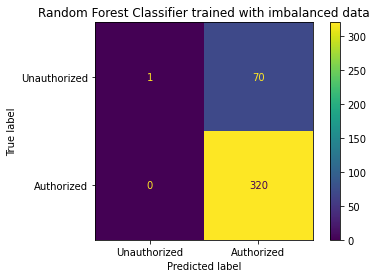

In [31]:
plot_confusion_matrix(clf_RF, X_val_fs, y_val, display_labels=["Unauthorized", "Authorized"]).ax_.set_title('Random Forest Classifier trained with imbalanced data');

# **Training on resampled data**

In [32]:
training_set_im = pd.concat([X_train_fs, y_train], axis=1)

In [33]:
majority = training_set_im[training_set_im['Authorisation status']==1] 
minority = training_set_im[training_set_im['Authorisation status']==0] 

# Downsample majority class

In [34]:
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=seed)

**Combine minority class with downsampled majority class**

In [35]:
downsampled = pd.concat([majority_downsampled, minority])

**Shuffle to avoid any element of bias/patterns**

In [36]:
downsampled = downsampled.sample(frac=1)

**Define predictors variable and target variable based on the downsampled data**

In [37]:
X_down_train = downsampled.drop(['Authorisation status'], axis=1)
y_down_train = downsampled['Authorisation status']

**Logistic Regression Model trained with downsampled data**

In [38]:
logisticRegr.fit(X_down_train, y_down_train) 
acc_train, _, _ = model_performance(X_down_train, y_down_train, logisticRegr)
print(f'Accuracy of Logistic Regression Model trained with Down-sampled data (train set): {acc_train}')
acc, spe, sen = model_performance(X_val_fs, y_val, logisticRegr)
print('The performance of Logistic Regression Model trained with Down-sampled data:', f'Accuracy: {acc}', f'Specificity: {spe}', f'Sensitivity: {sen}', sep='\n')

Accuracy of Logistic Regression Model trained with Down-sampled data (train set): 0.603
The performance of Logistic Regression Model trained with Down-sampled data:
Accuracy: 0.596
Specificity: 0.62
Sensitivity: 0.591


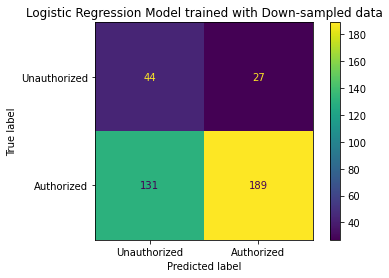

In [39]:
plot_confusion_matrix(logisticRegr, X_val_fs, y_val, display_labels=["Unauthorized", "Authorized"]).ax_.set_title('Logistic Regression Model trained with Down-sampled data');

# Upsample minority class

In [40]:
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=seed) 

**Combine majority class with upsampled minority class**

In [41]:
upsampled = pd.concat([minority_upsampled, majority])

**Define predictors variable and target variable based on the upsampled data**

In [42]:
X_up_train = upsampled.drop(['Authorisation status'], axis=1)
y_up_train = upsampled['Authorisation status']

**Logistic Regression Model trained with upsampled data**

In [43]:
logisticRegr.fit(X_up_train, y_up_train)
acc_train, _, _ = model_performance(X_up_train, y_up_train, logisticRegr)
print(f'Accuracy of Logistic Regression Model trained with Up-sampled data (train set): {acc_train}')
acc, spe, sen = model_performance(X_val_fs, y_val, logisticRegr)
print('The performance of Logistic Regression Model trained with Up-sampled data:', f'Accuracy: {acc}', f'Specificity: {spe}', f'Sensitivity: {sen}', sep='\n')

Accuracy of Logistic Regression Model trained with Up-sampled data (train set): 0.638
The performance of Logistic Regression Model trained with Up-sampled data:
Accuracy: 0.596
Specificity: 0.62
Sensitivity: 0.591


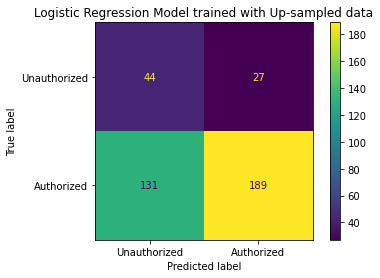

In [44]:
plot_confusion_matrix(logisticRegr, X_val_fs, y_val, display_labels=["Unauthorized", "Authorized"]).ax_.set_title('Logistic Regression Model trained with Up-sampled data');

# Support Vector Classification Model trained with downsampled data

In [45]:
clf_svc.fit(X_down_train, y_down_train)
acc_train, _, _ = model_performance(X_down_train, y_down_train, clf_svc)
print(f'Accuracy of Support Vector Classification Model trained with Down-sampled data (train set): {acc_train}')
acc, spe, sen = model_performance(X_val_fs, y_val, clf_svc)
print('The performance of Support Vector Classification Model trained with Down-sampled data:', f'Accuracy: {acc}', f'Specificity: {spe}', f'Sensitivity: {sen}', sep='\n')

Accuracy of Support Vector Classification Model trained with Down-sampled data (train set): 0.608
The performance of Support Vector Classification Model trained with Down-sampled data:
Accuracy: 0.588
Specificity: 0.62
Sensitivity: 0.581


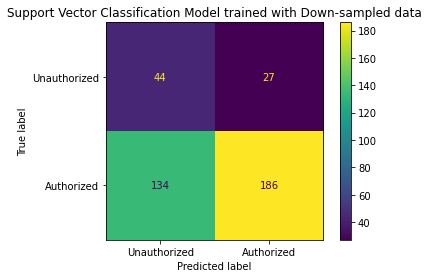

In [46]:
plot_confusion_matrix(clf_svc, X_val_fs, y_val, display_labels=["Unauthorized", "Authorized"]).ax_.set_title('Support Vector Classification Model trained with Down-sampled data');

# Neural Network trained with imbalanced data

In [47]:
weight_for_0 = (1 / 289)*(1561)/2.0 
weight_for_1 = (1 / 1272)*(1561)/2.0

c_w = {0: weight_for_0,
       1: weight_for_1}

METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Recall(name='recall'),
]

In [48]:
n_features = len(fs)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)
model.fit(X_train_fs, y_train, epochs=100, batch_size=32, class_weight=c_w, verbose=0)

In [49]:
acc_train = model.evaluate(X_train_fs, y_train, verbose=0)[5]
print(f'Accuracy of Neural Network trained with imbalanced data (train set): {acc_train:.2f}')
metrics = model.evaluate(X_val_fs, y_val, verbose=0)
spe = metrics[3] / (metrics[3]+metrics[2])
sen = metrics[1] / (metrics[1]+metrics[4])
print('The performance of Neural Network trained with imbalanced data:', f'Accuracy: {metrics[5]:.2f}', f'Specificity: {spe:.2f}', f'Sensitivity: {sen:.2f}', sep='\n')

Accuracy of Neural Network trained with imbalanced data (train set): 0.62
The performance of Neural Network trained with imbalanced data:
Accuracy: 0.60
Specificity: 0.62
Sensitivity: 0.59


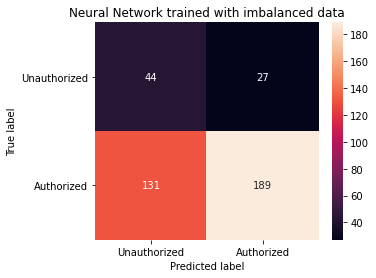

In [50]:
ax = sns.heatmap([[metrics[3], metrics[2]], [metrics[4], metrics[1]]], annot=True, fmt=".0f")
ax.figure.set_size_inches(5, 4)
ax.set_title('Neural Network trained with imbalanced data')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
ax.set_xticklabels(labels=["Unauthorized", "Authorized"])
ax.set_yticklabels(labels=["Unauthorized", "Authorized"], rotation='horizontal');